# T1 Q2

---

In [134]:
import math
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [7]:
csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

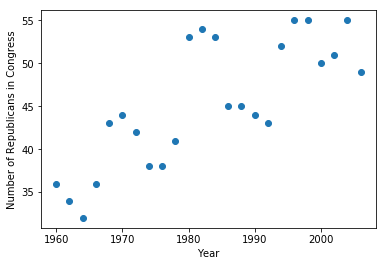

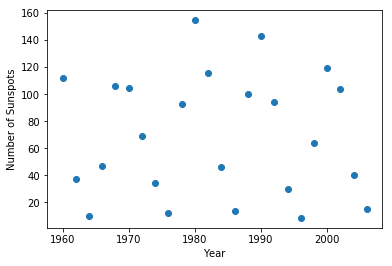

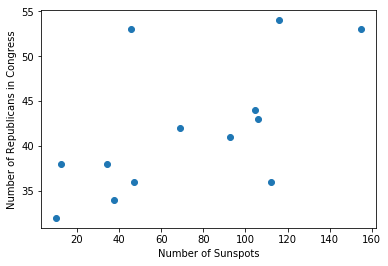

In [8]:
with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
plt.figure(1)
plt.plot(years, republican_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Republicans in Congress")
plt.figure(2)
plt.plot(years, sunspot_counts, 'o')
plt.xlabel("Year")
plt.ylabel("Number of Sunspots")
plt.figure(3)
plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
plt.xlabel("Number of Sunspots")
plt.ylabel("Number of Republicans in Congress")
plt.show()

In [339]:
def fun0(years): 
    # Create the simplest basis, with just the time and an offset.
    X = np.vstack((np.ones(years.shape), years)).T
    j_lst = [0]
    return X

def fun1(years): 
    j_lst = range(1,6)
    matrix = []
    for j in j_lst:
        col = years**j
        matrix.append(col)
    X = np.vstack((np.ones(years.shape), matrix)).T
    return X

def fun2(years): 
    j_lst = range(1960,2015,5)
    matrix = []
    for j in j_lst:
        col = -(years-j)**2/25
        exp_col = [math.exp(i) for i in col]
        matrix.append(exp_col)
    X = np.vstack((np.ones(years.shape), matrix)).T
    return X

def fun3(years): 
    j_lst = range(1,6)
    matrix = []
    for j in j_lst:
        col = years/j
        cos_col = [math.cos(i) for i in col]
        matrix.append(cos_col)
    X = np.vstack((np.ones(years.shape), matrix)).T
    return X

def fun4(years):
    j_lst = range(1,27)
    matrix = []
    for j in j_lst:
        col = years/j
        cos_col = [math.cos(i) for i in col]
        matrix.append(cos_col)
    X = np.vstack((np.ones(years.shape), matrix)).T
    return X

In [340]:
def run_plot_rep (X, grid_X):

    # Nothing fancy for outputs.
    Y = republican_counts

    # w dimensions are incorrect!!
    # Find the regression weights using the Moore-Penrose pseudoinverse.
    w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))

    # Compute the regression line on a grid of inputs.
    # DO NOT CHANGE grid_years!!!!!
    grid_years = np.linspace(1960, 2005, 200)
    grid_Yhat = np.dot(grid_X, w)

    # TODO: plot and report sum of squared error for each basis
    test_Y = np.dot(X, w)
    mse = np.square(np.subtract(Y, test_Y)).mean()

    # Plot the data and the regression line.
    plt.figure(1)
    plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
    plt.title("Year vs. Number of Republicans, R_2: %s" % mse)
    plt.xlabel("Year")
    plt.ylabel("Number of Republicans in Congress")
    plt.show()

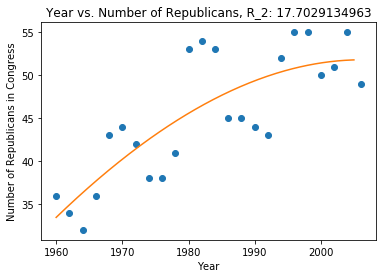

In [341]:
X = fun1(years)
grid_X = fun1(grid_years)
run_plot_rep (X, grid_X)

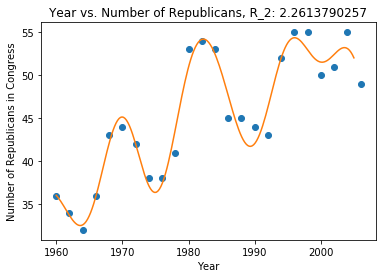

In [342]:
X = fun2(years)
grid_X = fun2(grid_years)
run_plot_rep (X, grid_X)

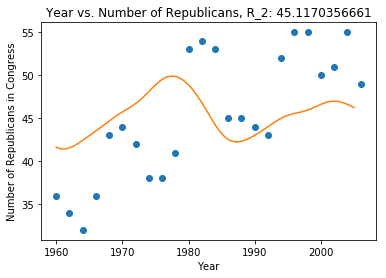

In [337]:
X = fun3(years)
grid_X = fun3(grid_years)
run_plot_rep (X, grid_X)

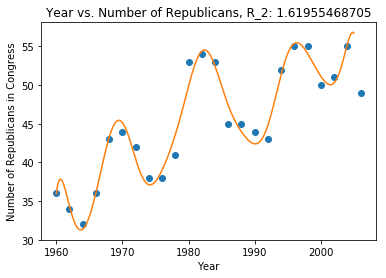

In [338]:
X = fun4(years)
grid_X = fun4(grid_years)
run_plot_rep (X, grid_X)

In [274]:
short_years = years[np.where(years<1985)]
sunspot_counts = sunspot_counts[:len(short_years)]

In [347]:
def run_plot_sun (X, grid_X, Y):

    # Nothing fancy for outputs.
    Y = republican_counts
    Y = Y[:len(short_years)]

    # w dimensions are incorrect!!
    # Find the regression weights using the Moore-Penrose pseudoinverse.
    w = np.linalg.solve(np.dot(X.T, X) , np.dot(X.T, Y))

    # Compute the regression line on a grid of inputs.
    # DO NOT CHANGE grid_years!!!!!
    grid_sunspots = np.linspace(0, 160, 200)
    grid_Yhat = np.dot(grid_X, w)

    # TODO: plot and report sum of squared error for each basis
    test_Y = np.dot(X, w)
    mse = mean_squared_error(Y, test_Y)

    # Plot the data and the regression line.
    plt.figure(1)
    plt.plot(sunspot_counts, Y, 'o', grid_sunspots, grid_Yhat, '-')
    plt.title("Sunspot Count vs. Number of Republicans, R_2: %s" % mse)
    plt.xlabel("Sunspot Count")
    plt.ylabel("Number of Republicans in Congress")
    plt.show()

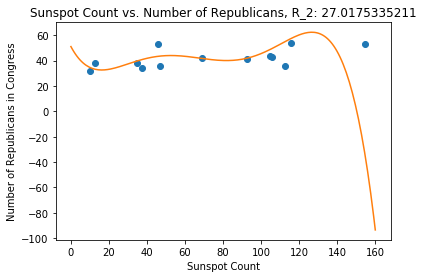

In [348]:
X = fun1(sunspot_counts)
grid_X = fun1(grid_sunspots)
run_plot_sun (X, grid_X, Y)

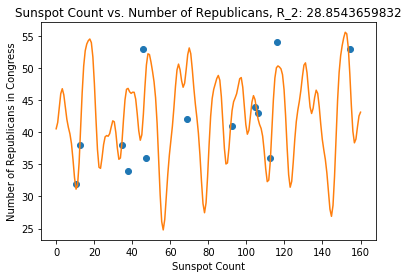

In [349]:
X = fun3(sunspot_counts)
grid_X = fun3(grid_sunspots)
run_plot_sun (X, grid_X, Y)

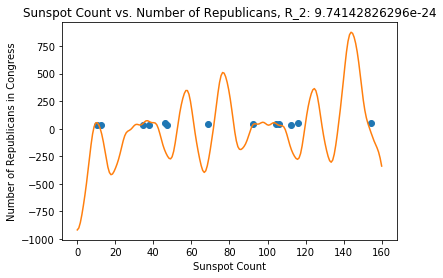

In [350]:
X = fun4(sunspot_counts)
grid_X = fun4(grid_sunspots)
run_plot_sun (X, grid_X, Y)